<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Module 1:</span> Exploratory Analysis</h1>
<hr>

Welcome to the workbook for <span style="color:royalblue">Module 1: Exploratory Analysis</span>!

Our goal with this step is to "get to know" the data. 
* Think of it like a "first date." 
* Try to learn as much about the data as possible, but don't invest too much time and get stuck on this step.
* You'll probably need to do ad-hoc data exploration later anyway, so you don't need to be 100% comprehensive right now.

<br><hr id="toc">

### In this module...

In this module, we'll go through the essential exploratory analysis steps:
1. [Basic information](#basic)
2. [Distributions of numeric features](#numeric)
3. [Distributions of categorical features](#categorical)
4. [Segmentations](#segmentations)
5. [Correlations](#correlations)

Along the way, we'll note the practical implications of our findings.

<br>
**(Reminder) To run a code cell...** 
1. Click anywhere in the cell to select it.
2. Press <code style="color:steelblue">Shift + Enter</code> to run the code.
3. You can insert new code cells using the **Insert** dropdown in the toolbar at the top.
<br><hr>

### First, let's import libraries and load the dataset.

In general, it's good practice to keep all of your library imports at the top of your notebook or program.

Before we do anything else, let's import the <code style="color:steelblue">print()</code> function from the future to ensure our code is compatible with Python 3.

In [ ]:
from __future__ import print_function  # Compatability with Python 3
print( 'Print function ready to serve.' )

Next, let's import the libraries we'll need for this module.

In [5]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

Next, let's import the dataset. 
* Pandas has a <code style="color:steelblue">pd.read_csv()</code> function for importing CSV files into a Pandas DataFrame. 
* You can name the DataFrame variable anything, but we prefer the simple name: <code style="color:steelblue">df</code> (short for DataFrame).

In [6]:
# Load real estate data from CSV
df = pd.read_csv('project_files/real_estate_data.csv')

Now we're ready to jump into exploring the data!

<br id="basic">
# 1. Basic information

First, always look at basic information about the dataset. 

<br>
Display the dimensions of the dataset.

In [9]:
# Dataframe dimensions
df.shape

(1883, 26)

Next, display the data types of our features.

In [10]:
# Column datatypes
df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

Display the first 5 rows to see example observations.

In [13]:
# Display first 5 rows of df
df.head()


,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 1.1</span>

Before moving on, let's dig a bit deeper into some of these functionalities. Getting some extra practice right now will set you up for smoother success as you continue through the project.

<br>
**First, try to filter <code style="color:steelblue">df.dtypes</code> to only categorical variables.**
* **Tip:** Remember our boolean masks from the Python Crash Course?
* **Tip:** A Series can be filtered by boolean masks the same way that a DataFrame can be.

In [27]:
# Filter and display only df.dtypes that are 'object'
object_mask = df.dtypes=='object'
df.dtypes[object_mask]

property_type     object
exterior_walls    object
roof              object
dtype: object

By the way, to actually get the **feature names** that you can iterate through, you have to access the <code style="color:steelblue">.index</code> attribute.

<br>
**Iterate through the categorical feature names and print each name.**
* **Tip:** Filter as you did above, and then call the <code style="color:steelblue">.index</code> attribute

In [59]:
# Loop through categorical feature names and print each one
df.dtypes[object_mask].index

'exterior_walls'

As you'll see later, the ability to select feature names based on some condition (instead of manually typing out each one) will be quite useful.

<br>
**Next, look at a few more examples by displaying the first 10 rows of data, instead of just the first 5.**
* **Tip:** <code style="color:steelblue">df.head()</code> returns the first 5 rows by default, but you can pass in an integer argument for the number of rows you want.

In [29]:
# Display the first 10 rows of data
df.head(10)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002
5,265000,1,1,641,1947,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,146,10,23,27,86,9,60,52,28.0,15.0,86.0,168.0,58.0,8.0,3.0,2004
6,240000,1,1,642,1944,0,Single-Family,Brick,NaN,NaN,159,13,36,17,92,12,66,50,28.0,36.0,88.0,176.0,61.0,7.0,3.0,2011
7,388100,1,1,650,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,266.0,92.0,9.0,3.0,2005
8,240000,1,1,660,1983,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,51,8,6,2,40,18,32,41,36.0,49.0,77.0,188.0,65.0,6.0,3.0,2013
9,250000,1,1,664,1965,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,119,10,26,25,183,13,70,36,57.0,13.0,83.0,147.0,51.0,6.0,3.0,2007


Finally, it's also helpful to look at the last 5 rows of data.
* Sometimes datasets will have **corrupted data** hiding at the very end (depending on the data source).
* It never hurts to double-check.

<br>
**Display the last 5 rows of data.**
* **Hint:** You've seen the "head," but what about the "tail?"

In [30]:
# Display last 5 rows of data
df.tail()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
1878,385000,5,6,6381,2004,224334,Single-Family,Stucco,Composition Shingle,1.0,0,0,0,0,3,0,0,1,46.0,76.0,87.0,1250.0,381.0,10.0,3.0,2002
1879,690000,5,6,6501,1956,23086,Single-Family,Brick,Composition Shingle,1.0,45,7,5,7,41,3,61,11,42.0,73.0,61.0,1553.0,473.0,9.0,3.0,2015
1880,600000,5,6,7064,1995,217800,Single-Family,Metal,Composition Shingle,1.0,5,1,1,1,8,2,1,2,43.0,87.0,66.0,942.0,287.0,8.0,1.0,1999
1881,759900,5,6,7500,2006,8886,Single-Family,Siding (Alum/Vinyl),Asphalt,1.0,18,2,4,0,5,1,8,6,43.0,61.0,51.0,803.0,245.0,5.0,2.0,2009
1882,735000,5,6,7515,1958,10497,Single-Family,Brick,Composition Shingle,1.0,0,0,0,1,2,2,0,5,37.0,80.0,86.0,1459.0,444.0,9.0,3.0,2015


<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<br id="numeric">
# 2. Distributions of numeric features

One of the most enlightening data exploration tasks is plotting the distributions of your features.

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 1.2</span>

**Plot the histogram grid, but make it larger, and rotate the x-axis labels clockwise by 45 degrees.**
* <code style="color:steelblue">df.hist()</code> has a <code style="color:steelblue">figsize=</code> argument takes a tuple for figure size.
* Try making the figure size 14 x 14
* <code style="color:steelblue">df.hist()</code> has a <code style="color:steelblue">xrot=</code> argument rotates x-axis labels **counter-clockwise**.
* The [documentation](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.hist.html) is useful for learning more about the arguments to the <code style="color:steelblue">.hist()</code> function.
* **Tip:** It's ok to arrive at the answer through **trial and error** (this is often easier than memorizing the various arguments).

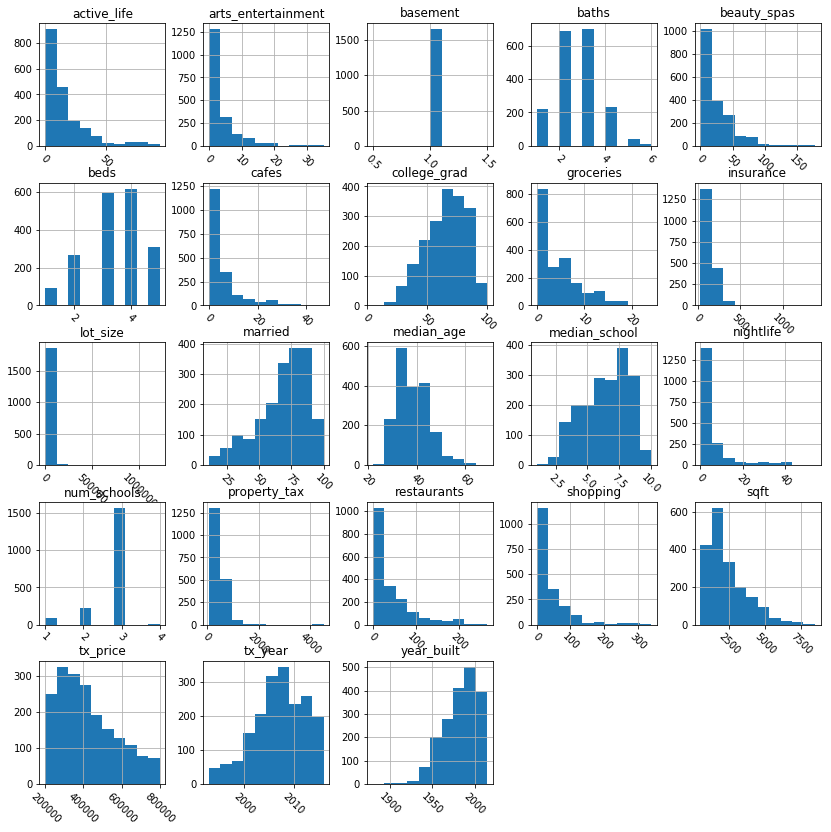

In [43]:
# Plot histogram grid
df.hist(figsize=(14,14),xrot=315)

# Clear the text "residue"
plt.show()

<br>
Ah, much better.

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

Display summary statistics for the numerical features.

In [51]:
# Summarize numerical features
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<br id="categorical">
# 3. Distributions of categorical features

Next, let's take a look at the distributions of our categorical features.

<br>
Display summary statistics for categorical features.

In [52]:
# Summarize categorical features
df.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


Plot bar plot for the <code style="color:steelblue">'exterior_walls'</code> feature.

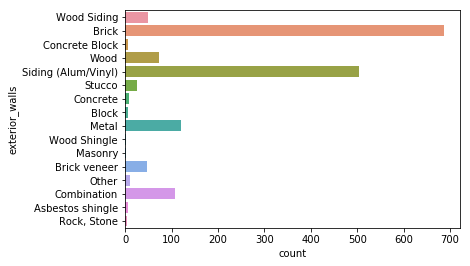

In [55]:
# Bar plot for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 1.3</span>

**Write a <code style="color:steelblue">for</code> loop to plot bar plots of each of the categorical features.**
* Write the loop to be able to handle any number of categorical features (borrow from your answer to <span style="color:royalblue">Exercise 1.1</span>).
* Invoke <code style="color:steelblue">plt.show()</code> after each bar plot to display all 3 plots in one output.
* Which features suffer from sparse classes?

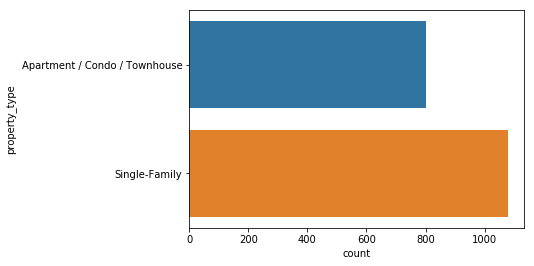

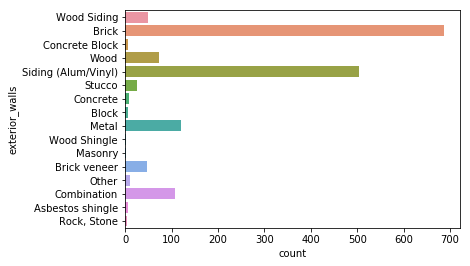

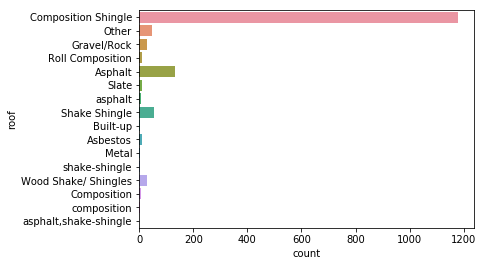

In [68]:
# Plot bar plot for each categorical feature

#for n in range(df.dtypes[df.dtypes=='object'].size) :
#    y_axis = df.dtypes[object_mask].index[n]
#    sns.countplot(y=y_axis, data=df)
#    plt.show()

for feature in df.dtypes[df.dtypes=='object'].index :
    sns.countplot(y=feature, data=df)
    plt.show()

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<br id="segmentations">
# 4. Segmentations

Next, let's create some segmentations. Segmentations are powerful ways to cut the data to observe the relationship between **categorical features** and **numeric features**.

<br>
Segment <code style="color:steelblue">'tx_price'</code> by <code style="color:steelblue">'property_type'</code> and plot the resulting distributions

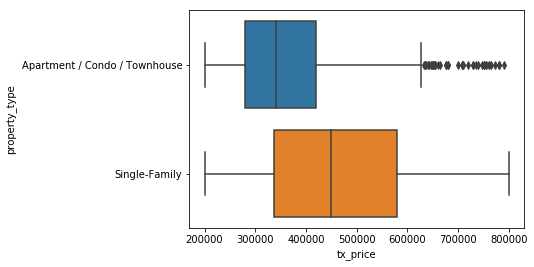

In [69]:
# Segment tx_price by property_type and plot distributions
sns.boxplot(y='property_type', x='tx_price', data=df)

Segment by <code style="color:steelblue">'property_type'</code> and calculate the average value of each feature within each class:

In [70]:
# Segment by property_type and display the means within each class
df.groupby('property_type').mean()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
property_type,,,,,,,,,,,,,,,,,,,,,,,
Apartment / Condo / Townhouse,366614.034869,2.601494,2.200498,1513.727273,1988.936488,3944.239103,1.0,58.418431,5.919054,7.855542,8.037360,57.631382,4.840598,32.087173,22.410959,37.199253,57.534247,66.372354,346.261519,105.652553,6.382316,2.831880,2007.941469
Single-Family,464644.711111,4.029630,2.862037,2935.865741,1978.523148,20417.666667,1.0,26.672222,3.453704,3.007407,3.308333,28.289815,2.318519,16.970370,10.946296,39.643519,77.685185,64.128704,556.383333,166.329630,6.592593,2.764815,2006.494444


<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 1.4</span>

On average, it looks like single family homes are more expensive.

How else do the different property types differ? Let's see:

<br>
**First, segment <code style="color:steelblue">'sqft'</code> by <code style="color:steelblue">'property_type'</code> and plot the boxplots.**

2663.0

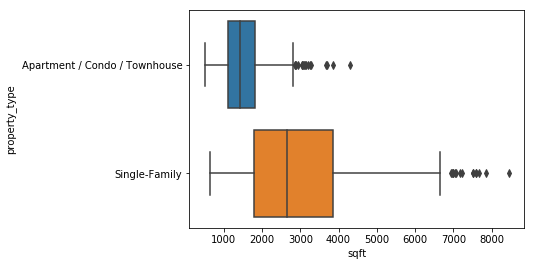

In [95]:
# Segment sqft by sqft and property_type distributions
sns.boxplot(y='property_type', x='sqft', data=df)
df[df['property_type']== "Single-Family"]['sqft'].median()

<br>
**After producing the plot, consider these questions:**
* Which type of property is larger, on average?
* Which type of property sees greater variance in sizes?
* Does the difference in distributions between classes make intuitive sense?

<br>
**Next, display the standard deviations of each feature alongside their means after performing a groupby.**
* This will give you a better idea of the variation within in feature, by class.
* **Tip:** Pass a list of metrics into the <code style="color:steelblue">.agg()</code> function, after performing your groupby.
* Check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for more help.

In [101]:
# Segment by property_type and display the means and standard deviations within each class
df.groupby('property_type').agg([np.std,np.mean])

tx_price                     beds  \
                                         std           mean       std   
property_type                                                           
Apartment / Condo / Townhouse  121784.490486  366614.034869  0.810220   
Single-Family                  157758.739013  464644.711111  0.795639   

                                            baths                   sqft  \
                                   mean       std      mean          std   
property_type                                                              
Apartment / Condo / Townhouse  2.601494  0.815009  2.200498   556.286650   
Single-Family                  4.029630  0.937551  2.862037  1422.871169   

                                           year_built               \
                                      mean        std         mean   
property_type                                                        
Apartment / Condo / Townhouse  1513.727273  15.513640  1988.936488   
Single-Family                  2935.865741  22.210582  1978.523148   

                                   lot_size               basement       \
                                        std          mean      std mean   
property_type                                                             
Apartment / Condo / Townhouse  44284.168767   3944.239103      0.0  1.0   
Single-Family                  44165.529302  20417.666667      0.0  1.0   

                              restaurants            groceries            \
                                      std       mean       std      mean   
property_type                                                              
Apartment / Condo / Townhouse   54.343594  58.418431  4.645774  5.919054   
Single-Family                   34.726416  26.672222  4.067285  3.453704   

                               nightlife               cafes            \
                                     std      mean       std      mean   
property_type                                                            
Apartment / Condo / Townhouse  10.643816  7.855542  9.077038  8.037360   
Single-Family                   5.543822  3.007407  5.325053  3.308333   

                                shopping            arts_entertainment  \
                                     std       mean                std   
property_type                                                            
Apartment / Condo / Townhouse  61.852299  57.631382           5.234834   
Single-Family                  42.292313  28.289815           3.929691   

                                        beauty_spas            active_life  \
                                   mean         std       mean         std   
property_type                                                                
Apartment / Condo / Townhouse  4.840598   26.910443  32.087173   21.058178   
Single-Family                  2.318519   22.872112  16.970370   12.599296   

                                         median_age               married  \
                                    mean        std       mean        std   
property_type                                                               
Apartment / Condo / Townhouse  22.410959   6.906584  37.199253  20.372706   
Single-Family                  10.946296   6.225732  39.643519  13.868205   

                                         college_grad            property_tax  \
                                    mean          std       mean          std   
property_type                                                                   
Apartment / Condo / Townhouse  57.534247    17.095874  66.372354   142.292282   
Single-Family                  77.685185    16.790347  64.128704   244.351559   

                                           insurance              \
                                     mean        std        mean   
property_type                                                      
Apartment / Condo / Townhouse  346.261519  47.118015

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<br id="correlations">
# 5. Correlations

Finally, let's take a look at the relationships between **numeric features** and **other numeric features**.

<br>
Create a <code style="color:steelblue">correlations</code> dataframe from <code style="color:steelblue">df</code>.

In [103]:
# Calculate correlations between numeric features
correlations = df.corr()
correlations

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000000,0.384046,0.389375,0.469573,0.033138,0.130558,NaN,-0.038027,-0.094314,0.009361,-0.001398,-0.038246,-0.021076,-0.054349,-0.001165,0.126335,0.200494,0.268577,0.535148,0.532947,0.175762,-0.014380,0.108782
beds,0.384046,1.000000,0.644572,0.691039,-0.011844,0.164399,NaN,-0.495834,-0.421412,-0.440844,-0.464289,-0.388670,-0.442168,-0.419832,-0.486957,0.133711,0.643240,-0.082354,0.547643,0.485776,0.137309,-0.124359,-0.174081
baths,0.389375,0.644572,1.000000,0.682060,0.206141,0.132976,NaN,-0.350210,-0.340024,-0.306686,-0.316836,-0.259603,-0.305885,-0.282008,-0.329736,0.095844,0.442225,0.016097,0.525776,0.475430,0.163365,-0.088299,-0.132110
sqft,0.469573,0.691039,0.682060,1.000000,0.254589,0.246016,NaN,-0.353759,-0.371167,-0.281540,-0.300969,-0.275586,-0.293402,-0.310465,-0.332663,0.109811,0.480167,0.065343,0.660264,0.594049,0.220669,-0.102032,-0.236190
year_built,0.033138,-0.011844,0.206141,0.254589,1.000000,0.000068,NaN,-0.106948,-0.222443,-0.080006,-0.102209,-0.121684,-0.195141,-0.163670,-0.134919,-0.237152,0.038208,-0.014204,-0.046504,-0.109521,0.155835,-0.188106,-0.043301
lot_size,0.130558,0.164399,0.132976,0.246016,0.000068,1.000000,NaN,-0.113887,-0.118574,-0.072224,-0.098182,-0.116560,-0.067189,-0.121075,-0.092668,0.099140,0.122028,-0.030725,0.165800,0.146579,0.096551,-0.031535,-0.048207
basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurants,-0.038027,-0.495834,-0.350210,-0.353759,-0.106948,-0.113887,NaN,1.000000,0.701462,0.926675,0.937616,0.818815,0.726907,0.867829,0.881799,-0.063816,-0.615584,0.214260,-0.100821,-0.019925,-0.068425,0.251171,0.044739
groceries,-0.094314,-0.421412,-0.340024,-0.371167,-0.222443,-0.118574,NaN,0.701462,1.000000,0.565003,0.602857,0.526356,0.502837,0.626850,0.574532,-0.022377,-0.508793,-0.006025,-0.159506,-0.093974,-0.354553,0.272856,0.115674
nightlife,0.009361,-0.440844,-0.306686,-0.281540,-0.080006,-0.072224,NaN,0.926675,0.565003,1.000000,0.923901,0.743321,0.703038,0.777461,0.858836,-0.028611,-0.568811,0.253717,-0.054386,0.024551,-0.036948,0.196399,0.027495


Visualize the correlation grid with a heatmap to make it easier to digest.

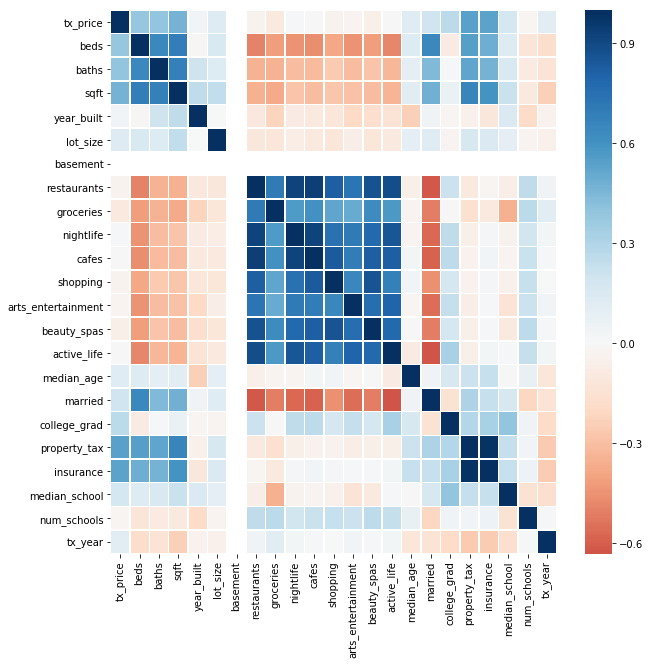

In [122]:
# Make the figsize 7 x 6
plt.figure(figsize=(10,10))

# Plot heatmap of correlations
sns.heatmap(correlations, cmap="RdBu", center = 0,linewidth=.5)

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 1.5</span>

When plotting a heatmap of correlations, it's often helpful to do four things:
1. Change the background to white. This way, 0 correlation will show as white
2. Annotate the cell with their correlations values
3. Mask the top triangle (less visual noise)
4. Drop the legend (colorbar on the side)

<br>
**First, change the background to white.**
* Seaborn has several different **themes**. The default theme is called <code style="color:crimson">'darkgrid'</code>.
* You can change the theme with <code style="color:steelblue">sns.set_style()</code>.
* You only need to run this once, and the theme will persist until you change it again.
* Change the theme to <code style="color:crimson">'white'</code>
* Make the figure size 10 x 8

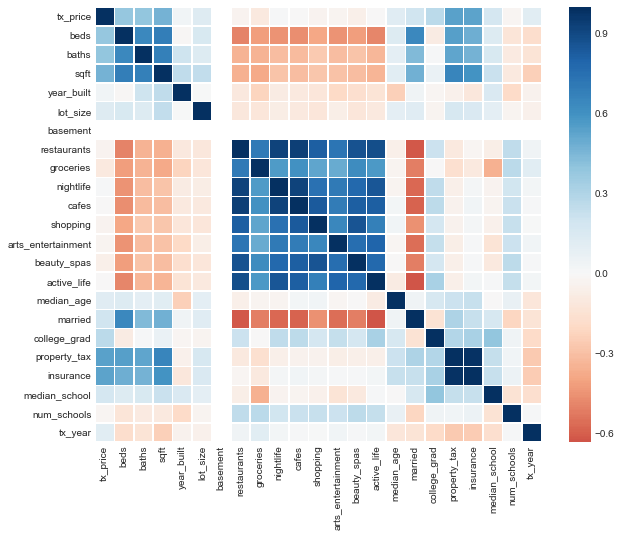

In [124]:
# Change color scheme
sns.set_style('white')

# Make the figsize 10 x 8
plt.figure(figsize=(10,8))

# Plot heatmap of correlations
sns.heatmap(correlations, cmap="RdBu", center = 0,linewidth=.5)

See how the cells for <code style="color:steelblue">'basement'</code> are now white? That's what we want because they were not able to be calculated.

<br>
**Next, display the correlation values in each cell.**
* The <code style="color:steelblue">annot=</code> argument controls whether to annotate each cell with its value. By default, it's <code style="color:crimson">False</code>.
* To make the chart cleaner, multiply the <code style="color:steelblue">correlations</code> DataFrame by 100 before passing it to the heatmap function.
* Pass in the argument <code style="color:steelblue">fmt=<span style="color:crimson">'.0f'</span></code> to format the annotations to a whole number.

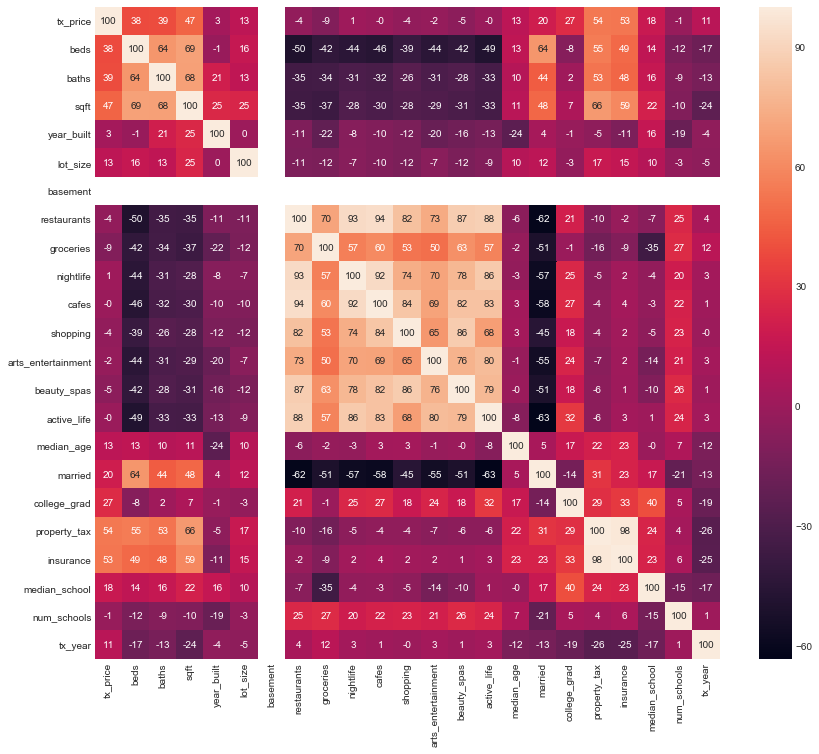

In [129]:
# Make the figsize 14 x 12
plt.figure(figsize=(14,12))

# Plot heatmap of annotated correlations
sns.heatmap(correlations*100, annot=True,fmt='.0f')

<br>
**Next, we'll generate a mask for the top triangle. Run this code:**

In [133]:
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

<br>
**Plot the heatmap again, this time using that mask.**
* <code style="color:steelblue">sns.heatmap()</code> has a <code style="color:steelblue">mask=</code> argument.
* Keep all of the other styling changes you've made up to now.

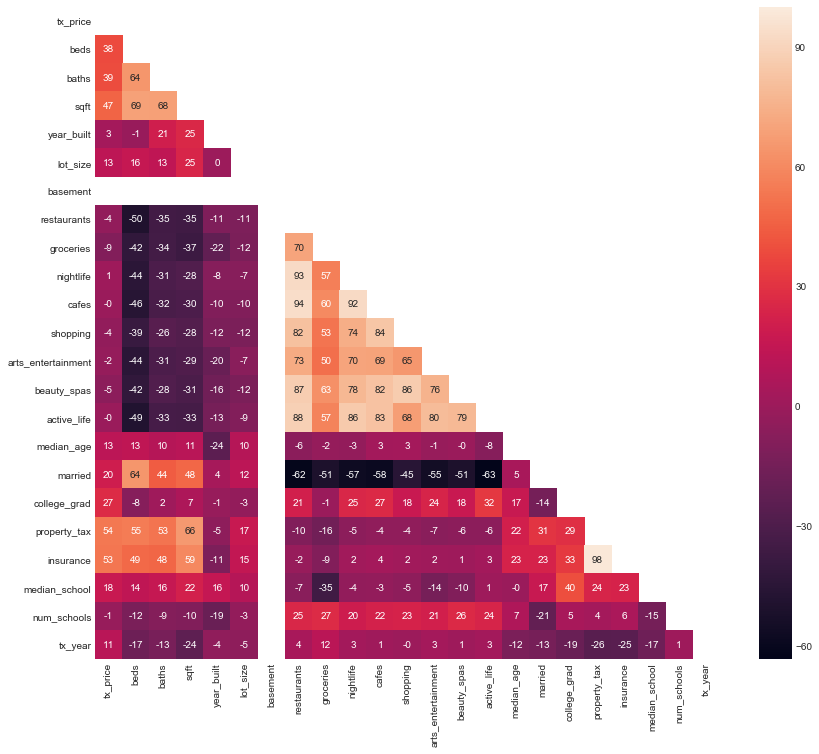

In [134]:
# Make the figsize 10 x 8
plt.figure(figsize=(14,12))
# Plot heatmap of correlations
sns.heatmap(correlations*100, annot=True,fmt='.0f',mask = mask)

<br>
**Finally, remove the colorbar on the side.**
* <code style="color:steelblue">sns.heatmap()</code> has a <code style="color:steelblue">cbar=</code> argument. By default, it's <code style="color:crimson">True</code>.
* Keep all of the other styling changes you've made up to now.
* But change the figure size to 9 x 8 (since we're removing the sidebar, this will help us keep nice proportions)

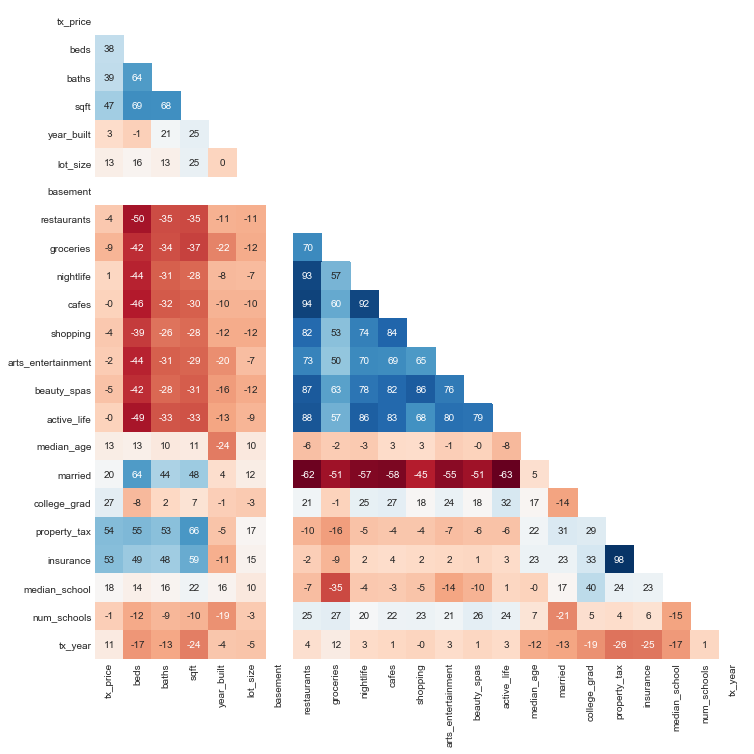

In [137]:
# Make the figsize 9 x 8
plt.figure(figsize=(14,12))
# Plot heatmap of correlations
sns.heatmap(correlations*100, annot=True,fmt='.0f',mask = mask,cbar=False,square=True,cmap='RdBu')


<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<br>
## Next Steps

Congratulations for making it through Project 2's Exploratory Analysis!

Before powering on to the next module, we recommend going back and reviewing the charts you made. This time, since you've already created them, you can move through more quickly and really start to understand the **story** behind the data.

As a reminder, here are a few things you did in this module:
* You explored basic information about your dataset.
* You plotted distributions of numeric and categorical features.
* You segmented your dataset by <code style="color:steelblue">'property_type'</code>.
* And you visualized a heatmap of feature correlations.

As you work through the next module, <span style="color:royalblue">Module 2: Data Cleaning</span>, we recommend keeping this workbook open in a separate tab. It might be helpful to have your charts in front of you as you clean the data.

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>